<a href="https://colab.research.google.com/github/Ikhadija-5/Microsoft-ADC-ML-Program/blob/main/Real_Estate_Regression_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This notebook contains the original codes I wrote for the challenge below

# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [47]:
import numpy as np
import matplotlib.pyplot as plt


In [48]:
import pandas as pd

# load the training dataset
data = pd.read_excel('/content/Real estate valuation data set.xlsx')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [49]:
# Your code to explore data and train a regression model
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

#Separting features and labels

In [50]:
X = data[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude', 'X6 longitude' ]]
X.head(5)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [51]:
y = data['Y house price of unit area']
y.head(5)

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

#Inspecting Correlated Features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


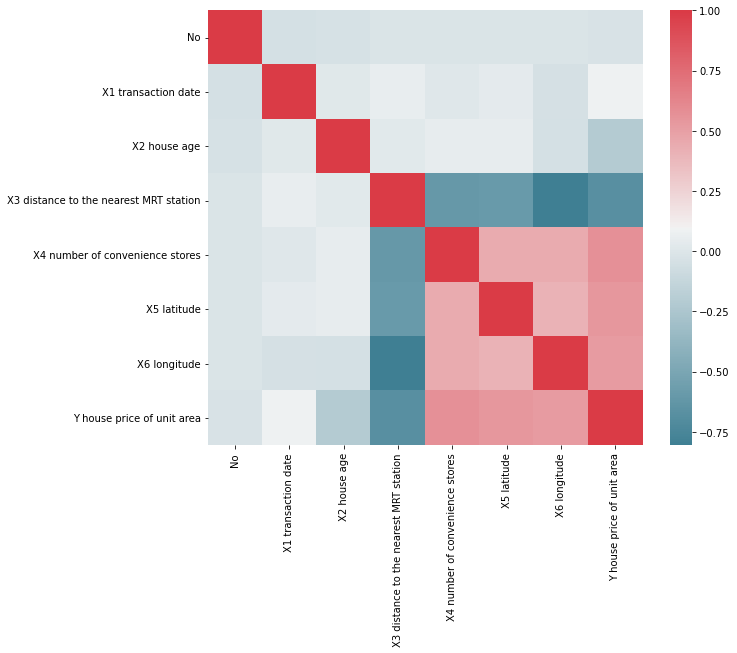

In [52]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#Normalizing features

In [53]:
X_normalized = (X - X.mean()) / X.std()

In [54]:
X_normalized.head(5)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1.254111,-0.791537,2.004982,1.124070,0.448220
1,0.156896,-0.615866,1.665488,0.911342,0.400654
2,-0.387322,-0.413515,0.307513,1.485063,0.687352
3,-0.387322,-0.413515,0.307513,1.485063,0.687352
4,-1.115873,-0.549332,0.307513,0.833180,0.592220


#Splitting Data into Train and Test Sets

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized,y, test_size = 20, random_state=0)

#Training a Linear Regression Model

MSE: 35.65494328508743
RMSE: 5.971176038695177
R2: 0.677883165629908


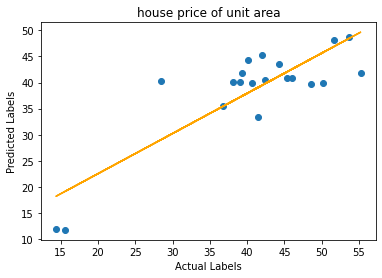

In [56]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)
pred_1 = model1.predict(X_test)


#Evaluating

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, pred_1)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, pred_1)
print("R2:", r2)



#Plotting predictions against actual values

plt.scatter(y_test, pred_1)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('house price of unit area')
# overlay the regression line
z = np.polyfit(y_test, pred_1, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='orange')
plt.show()

# Train a lasso model 



GradientBoostingRegressor() 

MSE: 116.50688470048442
RMSE: 5.971176038695177
R2: -0.05255612333949933


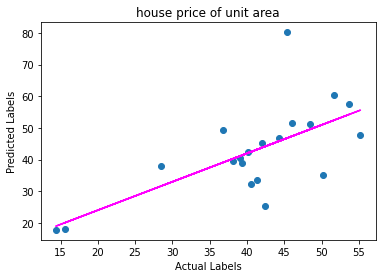

In [57]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
model2 = GradientBoostingRegressor().fit(X_train, y_train)
print (model2, "\n")


# Evaluating
pred_2 = model2.predict(X_test)
mse_2 = mean_squared_error(y_test, pred_2)
print("MSE:", mse_2)
rmse_2 = np.sqrt(mse_2)
print("RMSE:", rmse)
r2 = r2_score(y_test, pred_2)
print("R2:", r2)

plt.scatter(y_test, pred_2)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('house price of unit area')
# overlay the regression line
z = np.polyfit(y_test, pred_2, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [ ]:
# Your code to use the trained model

#Saving the model

In [60]:
import joblib

# Saving the linear regression model as a pickle file
filename = 'reg_model1.pkl'
joblib.dump(model1, filename)

# Saving the lasso regression model as a pickle file
filename = 'lasso_model1.pkl'
joblib.dump(model2, filename)

['lasso_model1.pkl']

#Using the saved model

In [82]:
linear_reg_model = joblib.load('/content/reg_model1.pkl')
lasso_reg_model = joblib.load('/content/lasso_model1.pkl')

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [70]:
d = {'transaction_date': [12013.167, 2013.000], 'house_age': [16.2, 13.6], 'transit_distance': [289.3248, 4082.015],  'local_convenience_stores' : [5, 0], 'latitude': [24.98203, 24.94155], 'longitude': [121.54348, 121.50381]}
New_data = pd.DataFrame(data = d)

In [86]:
New_data
Newdata_features = New_data[['house_age','transit_distance','local_convenience_stores','latitude','longitude']]

In [87]:
New_data['price_per_unit_area1'] = linear_reg_model.predict(Newdata_features)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- house_age
- latitude
- local_convenience_stores
- longitude
- transit_distance
Feature names seen at fit time, yet now missing:
- X2 house age
- X3 distance to the nearest MRT station
- X4 number of convenience stores
- X5 latitude
- X6 longitude

  warnings.warn(message, FutureWarning)


In [88]:
New_data

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit_area1,price_per_unit_area2
0,12013.167,16.2,289.3248,5,24.98203,121.54348,-1415.423788,38.594461
1,2013.000,13.6,4082.0150,0,24.94155,121.50381,-21025.502051,36.852952


In [83]:
New_data['price_per_unit_area2'] = lasso_reg_model.predict(Newdata_features)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- house_age
- latitude
- local_convenience_stores
- longitude
- transit_distance
Feature names seen at fit time, yet now missing:
- X2 house age
- X3 distance to the nearest MRT station
- X4 number of convenience stores
- X5 latitude
- X6 longitude

  warnings.warn(message, FutureWarning)


In [89]:
New_data

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit_area1,price_per_unit_area2
0,12013.167,16.2,289.3248,5,24.98203,121.54348,-1415.423788,38.594461
1,2013.000,13.6,4082.0150,0,24.94155,121.50381,-21025.502051,36.852952
